# 연습문제
- 다중분류에서 진행한 연령과 감정_대분류 모델에 워드 임베딩 Layer를 추가해보시오.
- 단, 감정_대분류의 경우 ‘당황‘, ‘불안’, ‘상처‘ 감정을 가진 대화는 제거하고 3분류 모델로 진행 하시오.

In [1]:
import pandas as pd

def read_data(filename, encoding='cp949', start=1):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = daㅁta[start:]
    return data

def write_data(data, filename, encoding='cp949'):
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)

path = '/Users/jsha/gjai/nlp/pytest/'
file = '감성대화말뭉치(최종데이터)_Training.xlsx'

df = pd.read_excel(path+file)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40879 entries, 0 to 40878
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      40879 non-null  int64 
 1   연령      40879 non-null  object
 2   성별      40879 non-null  object
 3   상황키워드   40879 non-null  object
 4   신체질환    40879 non-null  object
 5   감정_대분류  40879 non-null  object
 6   감정_소분류  40879 non-null  object
 7   사람문장1   40879 non-null  object
 8   시스템응답1  40879 non-null  object
 9   사람문장2   40879 non-null  object
 10  시스템응답2  40879 non-null  object
 11  사람문장3   31059 non-null  object
 12  시스템응답3  31059 non-null  object
 13  사람문장4   1472 non-null   object
 14  시스템응답4  1362 non-null   object
dtypes: int64(1), object(14)
memory usage: 4.7+ MB


In [3]:
df = df[['연령', '감정_대분류', '사람문장1', '사람문장2', '사람문장3', '사람문장4']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40879 entries, 0 to 40878
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령      40879 non-null  object
 1   감정_대분류  40879 non-null  object
 2   사람문장1   40879 non-null  object
 3   사람문장2   40879 non-null  object
 4   사람문장3   31059 non-null  object
 5   사람문장4   1472 non-null   object
dtypes: object(6)
memory usage: 1.9+ MB


In [4]:
new_df = df.fillna('')
new_df.isnull().sum()

연령        0
감정_대분류    0
사람문장1     0
사람문장2     0
사람문장3     0
사람문장4     0
dtype: int64

In [5]:
new_df['감정_대분류'].value_counts()

불안     7328
분노     6920
슬픔     6915
기쁨     6730
상처     6624
당황     6360
기쁨        1
불안        1
Name: 감정_대분류, dtype: int64

In [6]:
new_df['감정_대분류'] = new_df['감정_대분류'].map(lambda x: str.strip(x))

In [7]:
new_df['감정_대분류'].value_counts().index


Index(['불안', '분노', '슬픔', '기쁨', '상처', '당황'], dtype='object')

In [8]:
new_df = new_df[(new_df['감정_대분류'] == '기쁨') | (new_df['감정_대분류'] == '분노') | (new_df['감정_대분류'] == '슬픔')]
new_df['감정_대분류'].value_counts()

분노    6920
슬픔    6915
기쁨    6731
Name: 감정_대분류, dtype: int64

In [9]:
data = new_df.iloc[:,2:].to_numpy()
data = [' '.join(ar).rstrip() for ar in data]

In [10]:
print(len(data))
print(len(new_df.iloc[:,0]))

20566
20566


In [11]:
from tqdm import tqdm
import rhinoMorph
rn = rhinoMorph.startRhino()

morphed_data = []
morphed_text = ''
for data_each in tqdm(data):
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, 
                        data_each, pos=['NNG', 'NNP', 'VV',
                        'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
#                             xrVv=True, eomi=True)
    joined_data_each = ' '.join(morphed_data_each)
    if joined_data_each:
        morphed_data.append(joined_data_each)
        morphed_text += joined_data_each + '\n'


filepath:  /Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages
classpath:  /Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/rhinoMorph/lib/rhino.jar
RHINO started!


100%|██████████| 20566/20566 [00:24<00:00, 824.58it/s] 


In [12]:
path = '/Users/jsha/gjai/nlp/pytest/'
with open(path+'감성대화말뭉치(최종데이터)_Training_morphed.txt', 'w') as file:
    file.write(morphed_text)

In [13]:
from matplotlib import rc
rc('font', family='AppleGothic')

# 데이터 읽기와 쓰기를 위한 사용자 함수
def read_data(filename, encoding='cp949', start=1):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[start:]
    return data

def write_data(data, filename, encoding='cp949'):
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)

dummy = read_data(path+'감성대화말뭉치(최종데이터)_Training_morphed.txt', encoding='utf-8')
print('자료 타입:', type(dummy))
print('전체 문장수:', len(dummy))
print('형태소 분석 전 모습:', dummy[:5])

자료 타입: <class 'list'>
전체 문장수: 20565
형태소 분석 전 모습: [['재취업 되 받 되 첫 월급 오 가족 외식 하 예정 너무 행복 퇴직 후 다시 돈 못 벌 알 이렇게 월급 가족 맛있 밥 사 있 너무 행복 회사 생활 열심히 하 계속 월급 받'], ['빚 드디어 다 갚 되 이제야 안도감 들 빚 다 갚 당분간 아무 생각 안 하 살'], ['사십 접어들 머리카락 많이 빠지 고민 이러 대머리 되 걱정 아직 병원 진료 받 탈모 방지 샴푸 쓰 있'], ['이제 돈 지긋지긋 나이 넘 돈 나가 많 힘'], ['친구 괴롭 부모 선생 이야기 믿 너무 화도 나 좌절 하 상태 학교 다니 싫 증거 준비 다시 부모 선생 말씀 좋']]


# 연령 분류

In [14]:
from sklearn.model_selection import train_test_split

print(len(morphed_data))
data_text = morphed_data
data_label = new_df.iloc[:,0].to_list()
# data_label = new_df.iloc[:,1].to_list()

train_data_text, test_data_text, train_data_label, test_data_label = \
train_test_split(data_text, data_label, stratify=data_label, 
                 test_size=0.3, random_state=1111)

20566


In [15]:
len(test_data_text)

6170

In [16]:
from collections import Counter
train_data_label_freq = Counter(train_data_label)
print('train_data_label_freq:', train_data_label_freq)

test_data_label_freq = Counter(test_data_label)
print('test_data_label_freq:', test_data_label_freq)


train_data_label_freq: Counter({'청년': 4372, '중년': 3837, '노년': 3561, '청소년': 2626})
test_data_label_freq: Counter({'청년': 1874, '중년': 1644, '노년': 1527, '청소년': 1125})


In [17]:
test_data_text = test_data_text[:3000]
test_data_label = test_data_label[:3000]

In [18]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_data_text]
print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.round(np.mean(text_len),1))
print('중위수길이:', np.median(text_len))
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 99, 100]))
print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])

최소길이: 4
최대길이: 74
평균길이: 22.1
중위수길이: 22.0
구간별 최대 길이: [ 4. 17. 22. 27. 31. 40. 74.]
최소길이 문장: 친구 눈물 친구 거짓말
최대길이 문장: 어제 아들 무슨 잘못 하 야단 좀 치 글쎄 말 엄마 하 줄 있 기가 막히 애 뒷바라지 하 얼마나 고생 하 아들 그림 좀 잘 그리 편 한데 내가 미대 절대 안 되 그림 도구 같 다 버리 근데 부모 되 자식 진로 대하 결정 하 있 애가 공부 시간 없 틈 나 붓 잡 있 화 나 그리하 아들 좀 미안 하 마음 있 한데 그렇 부모 그렇게 말 하 더 나쁘


In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math 

max_words = 9000
maxlen = 40

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

Using TensorFlow backend.


In [20]:
print('wjscpdptj %s개의 고유한 토큰을 찾았습니다' % len(word_index))
print('word_index type:', type(word_index))
# print('word_index:', word_index)

wjscpdptj 9846개의 고유한 토큰을 찾았습니다
word_index type: <class 'dict'>


In [21]:
seq_data = tokenizer.texts_to_sequences(train_data_text)
# print('data', data)

len_d = [len(d) for d in data]
# print('길이:', len_d)
print('최대 문장 길이:', max(len_d))
print('최소 문장 길이:', min(len_d))

최대 문장 길이: 297
최소 문장 길이: 19


In [22]:
pad_data = pad_sequences(seq_data, maxlen=maxlen)

print('data:', pad_data)
print('data 0:', pad_data[0])
print('data 0의 길이:', len(pad_data[0]))

data: [[   0    0    0 ...  384   51    1]
 [   0    0    0 ... 1466 1594 1292]
 [   0    0    0 ... 1147  193  114]
 ...
 [   0    0    0 ... 1457   75    1]
 [   0    0    0 ...  366   23  106]
 [   0    0    0 ...   31   37  354]]
data 0: [   0    0    0    0    0    0    0    0    0   30 2115 2881 1073  132
 1146    1   38 1017  172    5  297 4360   25   26  236    1   28   16
  357   21 2017  329  497  107 4361 1334   20  384   51    1]
data 0의 길이: 40


In [23]:
print('train_data_text type:', type(train_data_text))
print('data type:', type(pad_data))
print('train_data_text 0:', train_data_text[0])
print('data 0:', pad_data[0])

train_data_text type: <class 'list'>
data type: <class 'numpy.ndarray'>
train_data_text 0: 회사 권고 사직 권유 그래도 정년 하 알 배신 당하 같 화나 한창 힘들 때 이해 하 이제 일 구하 모르 착잡 퇴근 동네 한 바퀴 돌 생각 정리 좀 하
data 0: [   0    0    0    0    0    0    0    0    0   30 2115 2881 1073  132
 1146    1   38 1017  172    5  297 4360   25   26  236    1   28   16
  357   21 2017  329  497  107 4361 1334   20  384   51    1]


In [24]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# x_train = to_one_hot(pad_data, dimension=max_words)
x_train = pad_data

In [25]:
# print('train_data_text type:', type(train_data_text))
# print(len(train_data_text[0]))
# print('texts 0:', train_data_text[0])

# print('data type:', type(x_train))
# print(len(x_train[0]))
# print('x_train [0][0:100]:', x_train[0][:100])

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data_label)
print(le.classes_)
train_data_label = le.transform(train_data_label)

['노년' '중년' '청년' '청소년']


In [27]:
test_data_label = le.transform(test_data_label)

In [28]:
class_number = len(le.classes_)
y_train = to_one_hot(train_data_label, dimension=class_number)
print(y_train)

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [29]:
data_test = tokenizer.texts_to_sequences(test_data_text)

data_test = pad_sequences(data_test, maxlen=maxlen)

x_test = data_test

y_test = to_one_hot(test_data_label, dimension=class_number)
print(y_test)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [30]:
print('훈련 데이터 본문 텐서의 크기:', x_train.shape)
print('훈련 데이터 레이블 텐서의 크기:', y_train.shape)

print('테스트 데이터 본문 텐서의 크기:', x_test.shape)
print('테스트 데이터 레이블 텐서의 크기:', y_test.shape)

훈련 데이터 본문 텐서의 크기: (14396, 40)
훈련 데이터 레이블 텐서의 크기: (14396, 4)
테스트 데이터 본문 텐서의 크기: (3000, 40)
테스트 데이터 레이블 텐서의 크기: (3000, 4)


In [31]:
y_train.shape

(14396, 4)

In [32]:
import os

class_number = y_train.shape[-1]
epochs = 10
batch_size = 100
embedding_dim = 200
model_name = 'train_data_age_morphed_model.h5'
tokenizer_name = 'train_data_age_morphed_token.pickle'
labelencode_name = 'train_data_age_morphed_le.pickle'

working_path = '/Users/jsha/gjai/nlp/pytest/15_working/'
save_path = working_path + 'practice/'
if not os.path.exists(save_path):
    os.mkdir(save_path)
    print(f'made {save_path} directory')
os.chdir(save_path)

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers

model = Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, 
                          input_length=maxlen))
model.add(layers.Flatten())

model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=class_number, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 200)           1800000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                512064    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
Total params: 2,314,276
Trainable params: 2,314,276
Non-trainable params: 0
_________________________________________________________________


In [34]:
from keras.callbacks import EarlyStopping
import os

checkpoint_path = save_path
# checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_path):
    print('{} --- Folder already exists\n'.format(checkpoint_path))
else:
    os.makedirs(checkpoint_path, exist_ok=True)
    print('{} --- Folder created\n'.format(checkpoint_path))

/Users/jsha/gjai/nlp/pytest/15_working/practice/ --- Folder already exists



In [35]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['acc'])

In [36]:
from keras.callbacks import ModelCheckpoint

earlystop_callback = EarlyStopping(monitor='val_acc', patience=2)
cp_callback = ModelCheckpoint(filepath=checkpoint_path+model_name,
                             monitor='val_acc', verbose=1, 
                             save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs,
                   batch_size=batch_size, validation_split=0.3,
                   callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10077 samples, validate on 4319 samples
Epoch 1/10
10077/10077 [==============================] - 4s 437us/step - loss: 1.1316 - acc: 0.4668 - val_loss: 0.8072 - val_acc: 0.6569

Epoch 00001: val_acc improved from -inf to 0.65687, saving model to /Users/jsha/gjai/nlp/pytest/15_working/practice/train_data_age_morphed_model.h5
Epoch 2/10
10077/10077 [==============================] - 4s 432us/step - loss: 0.6073 - acc: 0.7609 - val_loss: 0.7800 - val_acc: 0.6703

Epoch 00002: val_acc improved from 0.65687 to 0.67029, saving model to /Users/jsha/gjai/nlp/pytest/15_working/practice/train_data_age_morphed_model.h5
Epoch 3/10
10077/10077 [==============================] - 4s 417us/step - loss: 0.3186 - acc: 0.8945 - val_loss: 0.7425 - val_acc: 0.7189

Epoch 00003: val_acc improved from 0.67029 to 0.71892, saving model to /Users/jsha/gjai/nlp/pytest/15_working/practice/train_data_age_morphed_model.h5
Epoch 4/10
10077/10077 [==============================] - 4s 435us/step - loss: 0.11

In [37]:
import pickle

# model.save(model_name)

with open(checkpoint_path+tokenizer_name, 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(checkpoint_path+labelencode_name, 'wb') as file:
    pickle.dump(le, file, protocol=pickle.HIGHEST_PROTOCOL)
    

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('validation accuracy of each epoch:', np.round(val_acc,3))
epochs = range(1, len(val_acc)+1)

validation accuracy of each epoch: [0.657 0.67  0.719 0.703 0.691]


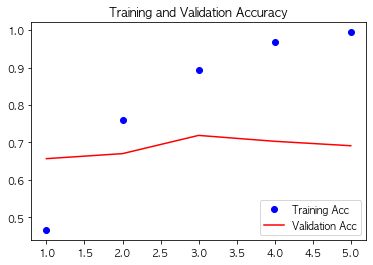

In [39]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend(loc=4)
plt.show()

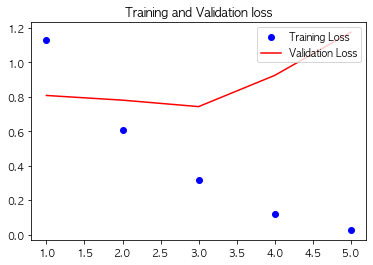

In [40]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=1)
plt.show()

In [41]:
from keras.models import load_model

loaded_model = load_model(checkpoint_path+model_name)

with open(checkpoint_path+tokenizer_name, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [42]:
test_eval = loaded_model.evaluate(x_test, y_test)

print('age prediction')
print('prediction model loss & acc:', test_eval)

3000/3000 [==============================] - 0s 89us/step
age prediction
prediction model loss & acc: [0.7163980782826741, 0.7206666469573975]


# 감정 분류

In [43]:
new_df.columns

Index(['연령', '감정_대분류', '사람문장1', '사람문장2', '사람문장3', '사람문장4'], dtype='object')

In [44]:
from sklearn.model_selection import train_test_split

print(len(morphed_data))
data_text = morphed_data
# data_label = new_df.iloc[:,0].to_list()
data_label = new_df.iloc[:,1].to_list()

train_data_text, test_data_text, train_data_label, test_data_label = \
train_test_split(data_text, data_label, stratify=data_label, 
                 test_size=0.3, random_state=1111)

20566


In [45]:
from collections import Counter
train_data_label_freq = Counter(train_data_label)
print('train_data_label_freq:', train_data_label_freq)

test_data_label_freq = Counter(test_data_label)
print('test_data_label_freq:', test_data_label_freq)


train_data_label_freq: Counter({'분노': 4844, '슬픔': 4840, '기쁨': 4712})
test_data_label_freq: Counter({'분노': 2076, '슬픔': 2075, '기쁨': 2019})


In [46]:
test_data_text = test_data_text[:3000]
test_data_label = test_data_label[:3000]

In [47]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_data_text]
print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.round(np.mean(text_len),1))
print('중위수길이:', np.median(text_len))
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 99, 100]))
print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])

최소길이: 4
최대길이: 74
평균길이: 22.1
중위수길이: 22.0
구간별 최대 길이: [ 4. 17. 22. 27. 31. 40. 74.]
최소길이 문장: 남편 돼지 대화 하
최대길이 문장: 어제 아들 무슨 잘못 하 야단 좀 치 글쎄 말 엄마 하 줄 있 기가 막히 애 뒷바라지 하 얼마나 고생 하 아들 그림 좀 잘 그리 편 한데 내가 미대 절대 안 되 그림 도구 같 다 버리 근데 부모 되 자식 진로 대하 결정 하 있 애가 공부 시간 없 틈 나 붓 잡 있 화 나 그리하 아들 좀 미안 하 마음 있 한데 그렇 부모 그렇게 말 하 더 나쁘


In [48]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math 

# max_words = 10000
# maxlen = 40

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

In [49]:
print('wjscpdptj %s개의 고유한 토큰을 찾았습니다' % len(word_index))
print('word_index type:', type(word_index))
# print('word_index:', word_index)

wjscpdptj 9881개의 고유한 토큰을 찾았습니다
word_index type: <class 'dict'>


In [50]:
seq_data = tokenizer.texts_to_sequences(train_data_text)
# print('data', data)

len_d = [len(d) for d in data]
# print('길이:', len_d)
print('최대 문장 길이:', max(len_d))
print('최소 문장 길이:', min(len_d))

최대 문장 길이: 297
최소 문장 길이: 19


In [51]:
pad_data = pad_sequences(seq_data, maxlen=maxlen)

print('data:', pad_data)
print('data 0:', pad_data[0])
print('data 0의 길이:', len(pad_data[0]))

data: [[   0    0    0 ...   14 6642    7]
 [   0    0    0 ...   12    1    5]
 [   0    0    0 ...  796 1580  437]
 ...
 [   0    0    0 ...   85 1649  255]
 [   0    0    0 ...   75    9   15]
 [   0    0    0 ...    1    6  448]]
data 0: [   0    0    0    0    0    0    0    0    0    0  386  141    1    4
  344  128 2894   28  134    1   17  102   28   13  141   50  244    4
   28 2895    1  108   28    1   17   50  356   14 6642    7]
data 0의 길이: 40


In [52]:
print('train_data_text type:', type(train_data_text))
print('data type:', type(pad_data))
print('train_data_text 0:', train_data_text[0])
print('data 0:', pad_data[0])

train_data_text type: <class 'list'>
data type: <class 'numpy.ndarray'>
train_data_text 0: 곧 은퇴 하 되 근데 그런 와중 아내 감사 하 일 생기 아내 말 은퇴 열심히 일하 되 아내 자영업 하 고맙 아내 하 일 열심히 돕 더 번창 있
data 0: [   0    0    0    0    0    0    0    0    0    0  386  141    1    4
  344  128 2894   28  134    1   17  102   28   13  141   50  244    4
   28 2895    1  108   28    1   17   50  356   14 6642    7]


In [53]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# x_train = to_one_hot(pad_data, dimension=max_words)
x_train = pad_data

In [54]:
print('train_data_text type:', type(train_data_text))
print(len(train_data_text[0]))
print('texts 0:', train_data_text[0])

print('data type:', type(x_train))
print(len(x_train[0]))
print('x_train [0][0:100]:', x_train[0][:100])

train_data_text type: <class 'list'>
79
texts 0: 곧 은퇴 하 되 근데 그런 와중 아내 감사 하 일 생기 아내 말 은퇴 열심히 일하 되 아내 자영업 하 고맙 아내 하 일 열심히 돕 더 번창 있
data type: <class 'numpy.ndarray'>
40
x_train [0][0:100]: [   0    0    0    0    0    0    0    0    0    0  386  141    1    4
  344  128 2894   28  134    1   17  102   28   13  141   50  244    4
   28 2895    1  108   28    1   17   50  356   14 6642    7]


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data_label)
print(le.classes_)
train_data_label = le.transform(train_data_label)

['기쁨' '분노' '슬픔']


In [56]:
test_data_label = le.transform(test_data_label)

In [57]:
class_number = len(le.classes_)
y_train = to_one_hot(train_data_label, dimension=class_number)
print(y_train)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [58]:
data_test = tokenizer.texts_to_sequences(test_data_text)

data_test = pad_sequences(data_test, maxlen=maxlen)

# 원핫 인코딩 안함
x_test = data_test

y_test = to_one_hot(test_data_label, dimension=class_number)
print(y_test)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [59]:
print('훈련 데이터 본문 텐서의 크기:', x_train.shape)
print('훈련 데이터 레이블 텐서의 크기:', y_train.shape)

print('테스트 데이터 본문 텐서의 크기:', x_test.shape)
print('테스트 데이터 레이블 텐서의 크기:', y_test.shape)

훈련 데이터 본문 텐서의 크기: (14396, 40)
훈련 데이터 레이블 텐서의 크기: (14396, 3)
테스트 데이터 본문 텐서의 크기: (3000, 40)
테스트 데이터 레이블 텐서의 크기: (3000, 3)


In [60]:
import os

class_number = y_train.shape[-1]
epochs = 10
batch_size = 100
embedding_dim = 200
model_name = 'train_data_age_morphed_model.h5'
tokenizer_name = 'train_data_age_morphed_token.pickle'
labelencode_name = 'train_data_age_morphed_le.pickle'

working_path = '/Users/jsha/gjai/nlp/pytest/15_working/'
save_path = working_path + 'practice/'
if not os.path.exists(save_path):
    os.mkdir(save_path)
    print(f'made {save_path} directory')
os.chdir(save_path)

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers

model = Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, 
                          input_length=maxlen))
model.add(layers.Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=class_number, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 200)           1800000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1024128   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 2,834,563
Trainable params: 2,834,563
Non-trainable params: 0
____________________________________________

In [62]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['acc'])

In [63]:
from keras.callbacks import EarlyStopping
import os

checkpoint_path = save_path
# checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_path):
    print('{} --- Folder already exists\n'.format(checkpoint_path))
else:
    os.makedirs(checkpoint_path, exist_ok=True)
    print('{} --- Folder created\n'.format(checkpoint_path))

/Users/jsha/gjai/nlp/pytest/15_working/practice/ --- Folder already exists



In [64]:
from keras.callbacks import ModelCheckpoint

earlystop_callback = EarlyStopping(monitor='val_acc', patience=2)
cp_callback = ModelCheckpoint(filepath=checkpoint_path+model_name,
                             monitor='val_acc', verbose=1, 
                             save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs,
                   batch_size=batch_size, validation_split=0.3,
                   callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10077 samples, validate on 4319 samples
Epoch 1/10
10077/10077 [==============================] - 5s 515us/step - loss: 0.8293 - acc: 0.5870 - val_loss: 0.5592 - val_acc: 0.7652

Epoch 00001: val_acc improved from -inf to 0.76522, saving model to /Users/jsha/gjai/nlp/pytest/15_working/practice/train_data_age_morphed_model.h5
Epoch 2/10
10077/10077 [==============================] - 5s 498us/step - loss: 0.3503 - acc: 0.8646 - val_loss: 0.4939 - val_acc: 0.8055

Epoch 00002: val_acc improved from 0.76522 to 0.80551, saving model to /Users/jsha/gjai/nlp/pytest/15_working/practice/train_data_age_morphed_model.h5
Epoch 3/10
10077/10077 [==============================] - 5s 483us/step - loss: 0.1236 - acc: 0.9614 - val_loss: 0.6658 - val_acc: 0.7856

Epoch 00003: val_acc did not improve from 0.80551
Epoch 4/10
10077/10077 [==============================] - 5s 512us/step - loss: 0.0293 - acc: 0.9914 - val_loss: 0.8209 - val_acc: 0.7712

Epoch 00004: val_acc did not improve from 0.80

In [65]:
import pickle

# model.save(model_name)

with open(checkpoint_path+tokenizer_name, 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(checkpoint_path+labelencode_name, 'wb') as file:
    pickle.dump(le, file, protocol=pickle.HIGHEST_PROTOCOL)
    

In [66]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('validation accuracy of each epoch:', np.round(val_acc,3))
epochs = range(1, len(val_acc)+1)

validation accuracy of each epoch: [0.765 0.806 0.786 0.771]


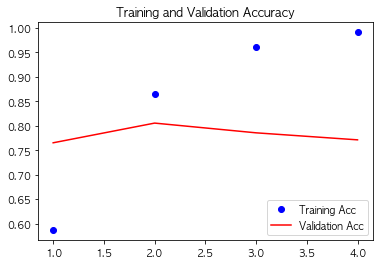

In [67]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend(loc=4)
plt.show()

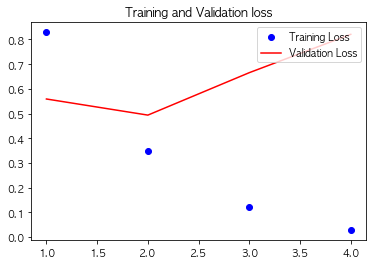

In [68]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=1)
plt.show()

In [69]:
from keras.models import load_model

loaded_model = load_model(checkpoint_path+model_name)

with open(checkpoint_path+tokenizer_name, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [70]:
test_eval = loaded_model.evaluate(x_test, y_test)
print('prediction emotion')
print('prediction model loss & acc:', test_eval)

3000/3000 [==============================] - 0s 112us/step
prediction emotion
prediction model loss & acc: [0.5037077797253927, 0.7983333468437195]
